In [1]:
import numpy as np
import pandas as pd

import twint

# Fixes runtime errors with twint
import nest_asyncio
nest_asyncio.apply()

import matplotlib
%matplotlib inline
import seaborn as sns; sns.set_style('ticks')

import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob
import re
import string
import emoji

import gzip
import pickle

%load_ext autoreload

%autoreload

from functions import *

In [2]:
pd.set_option('max_colwidth', 150)

# Loading csvs

In [233]:
jan = pd.read_csv('Datasets/5k_jan_tweets.csv', index_col=0)
feb = pd.read_csv('Datasets/5k_feb_tweets.csv', index_col=0)
mar = pd.read_csv('Datasets/5k_mar_tweets.csv', index_col=0)
apr = pd.read_csv('Datasets/5k_apr_tweets.csv', index_col=0)
may = pd.read_csv('Datasets/5k_may_tweets.csv', index_col=0)
months = [jan, feb, mar, apr, may]

In [234]:
df = pd.concat(months)
df.shape

(575949, 17)

### Obtaining target variable

In [235]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [236]:
conditions = [
    df.sentiment_score > .05,
    df.sentiment_score < -.05
]

choices = [
    'positive',
    'negative'
]

df['sentiment'] = np.select(conditions, choices, 'neutral')

In [334]:
print(df.shape)

(575949, 20)


In [257]:
df.reset_index(drop=True, inplace=True)

In [295]:
df.head()

,id,conversation_id,created_at,date,tweet,hashtags,user_id,username,name,link,retweet,nlikes,nreplies,nretweets,quote_url,retweet_id,reply_to,sentiment_score,sentiment
0,1.212523e+18,1.212523e+18,1.577923e+12,2020-01-01,"https://mltshp.com/p/1HLSB ""This is the death mask of Thomas, an unknown peasant that died in a river.""",[],8.431951e+17,Best_of_MLTSHP,MLTSHP,https://twitter.com/Best_of_MLTSHP/status/1212523477896294400,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '843195118924546048', 'username': 'Best_of_MLTSHP'}]",-0.8176,negative
1,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,Ready to heard this? Homemade hair treatment and ann cherry dead sea mud mask... Fucking putas swear they are more woman than me.... Bitch shut th...,[],1.044739e+18,lumora_lu,MiLu,https://twitter.com/lumora_lu/status/1212518043353530368,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '1044738746913034241', 'username': 'lumora_lu'}]",-0.8905,negative
2,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,"We all know what a joke #CCPChina is when it comes to epidemic outbreak,think of how they stayed silent about #SARS.\nDear world,stay away from #H...","['#ccpchina', '#sars', '#hk', '#hkers']",9.630325e+17,odiecher,odiecher,https://twitter.com/odiecher/status/1212517557690748928,False,1.0,1.0,1.0,https://twitter.com/WBYeats1865/status/1212430526826479616,NaN,"[{'user_id': '963032516759207936', 'username': 'odiecher'}]",0.6705,positive
3,1.212516e+18,1.200523e+18,1.577921e+12,2020-01-01,Thought death masks gave you the horn freak,[],2.819219e+09,Hevysmoker,Ashley Collins,https://twitter.com/Hevysmoker/status/1212515585562726401,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '2819219369', 'username': 'Hevysmoker'}, {'user_id': '1107018506300780544', 'username': 'cutedeadguys3'}]",-0.7783,negative
4,1.212510e+18,1.212391e+18,1.577920e+12,2020-01-01,"Interesting cult of death mask he’s wearing, 🤔\nelectronically posing as he did as of the CIA while Brennan was Chief. 🧐",[],2.361956e+08,FaithR8s,❌Patriot Fan🇺🇸🗽☕️🎶❌,https://twitter.com/FaithR8s/status/1212510409858670593,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '236195607', 'username': 'FaithR8s'}, {'user_id': '14745988', 'username': 'ThunderB'}, {'user_id': '14138785', 'username': 'Telegraph...",-0.2960,negative


In [8]:
df.to_csv('Datasets/5k_jan_thru_may_tweets.csv')

# Big Load!!!!!

In [4]:
df = pd.read_csv('Datasets/5k_jan_thru_may_tweets.csv', index_col=0)
df.shape

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(575949, 19)

In [5]:
df['date'] = df.date.astype('datetime64[ns]')

In [6]:
df.shape

(575949, 19)

# EDA/Feature Engineering

In [7]:
df[df.nlikes > 10].groupby('sentiment')['tweet'].count()

sentiment
negative    18052
neutral      8223
positive    21355
Name: tweet, dtype: int64

In [8]:
df[df.nlikes > 0].groupby('sentiment')['tweet'].count()

sentiment
negative    105452
neutral      49210
positive    121327
Name: tweet, dtype: int64

In [9]:
df.groupby('sentiment')['tweet'].count()

sentiment
negative    221363
neutral     115386
positive    239200
Name: tweet, dtype: int64

In [10]:
df.date[0]

Timestamp('2020-01-01 00:00:00')

In [11]:
df['month'] = df.date.apply(lambda x: x.month)
df['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [12]:
df.groupby('month').sentiment.value_counts(normalize=True)

month  sentiment
1      positive     0.412361
       negative     0.409046
       neutral      0.178592
2      negative     0.421300
       positive     0.401849
       neutral      0.176851
3      positive     0.430622
       negative     0.387278
       neutral      0.182100
4      positive     0.405667
       negative     0.346007
       neutral      0.248327
5      positive     0.417187
       negative     0.393458
       neutral      0.189355
Name: sentiment, dtype: float64

In [13]:
df.sentiment_score.describe()

count    575949.000000
mean          0.017756
std           0.505938
min          -0.998400
25%          -0.381800
50%           0.000000
75%           0.440400
max           0.999600
Name: sentiment_score, dtype: float64

In [14]:
df.groupby('month').sentiment.value_counts(normalize=True)

month  sentiment
1      positive     0.412361
       negative     0.409046
       neutral      0.178592
2      negative     0.421300
       positive     0.401849
       neutral      0.176851
3      positive     0.430622
       negative     0.387278
       neutral      0.182100
4      positive     0.405667
       negative     0.346007
       neutral      0.248327
5      positive     0.417187
       negative     0.393458
       neutral      0.189355
Name: sentiment, dtype: float64

In [15]:
df.groupby('date').sentiment.value_counts(normalize=True).unstack()

sentiment,negative,neutral,positive
date,,,
2020-01-01,0.692308,0.054945,0.252747
2020-01-02,0.566879,0.089172,0.343949
2020-01-03,0.602564,0.108974,0.288462
2020-01-04,0.587097,0.083871,0.329032
2020-01-05,0.500000,0.097701,0.402299
...,...,...,...
2020-05-27,0.425400,0.180400,0.394200
2020-05-28,0.421400,0.177800,0.400800
2020-05-29,0.395200,0.148600,0.456200


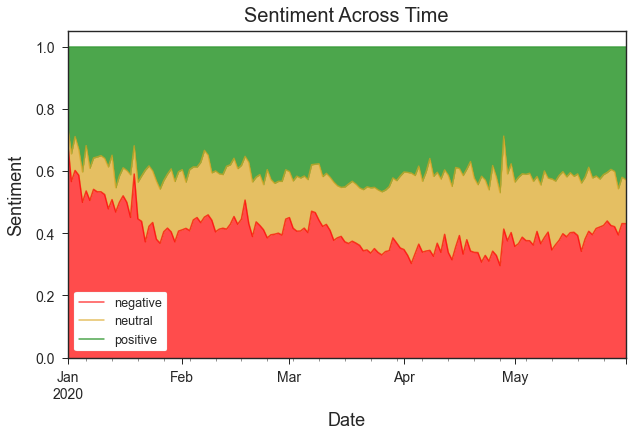

In [16]:
sns.set_style('ticks')

# sort by percentage of trees in good health
days = df.groupby('date').sentiment.value_counts(normalize=True).unstack()

# plot a stacked bar graph
p1 = days.plot.area(stacked = True, figsize=(10,6),
#                    title = 'Tree Health Across Boroughs', 
                   color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Sentiment Across Time', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['negative','neutral', 'positive'], facecolor='white', framealpha=1)
plt.show()

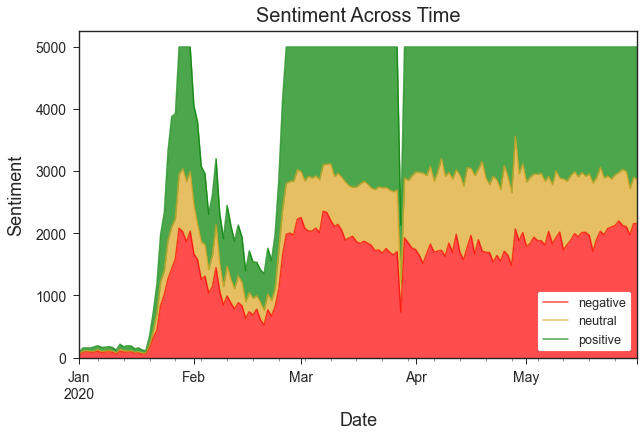

In [17]:
# sort by percentage of trees in good health
days = df.groupby('date').sentiment.value_counts().unstack()

# plot a stacked bar graph
p1 = days.plot.area(stacked = True, figsize=(10,6),
#                    title = 'Tree Health Across Boroughs', 
                   color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Sentiment Across Time', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['negative','neutral', 'positive'], facecolor='white', framealpha=1)
plt.show()

# Cleaning text

In [18]:
stop_words = stopwords.words('english')
stop_words += ['mask', '#mask',
               'masks', '#masks',
               'face', '#face',
               'facemask', '#facemask',
               'facemasks', '#facemasks', 
               'covid', '#covid',
               'covid19', '#covid19',
               'corona', '#corona',
               'coronavirus', '#coronavirus',
               'rona', '#rona',
               'virus', '#virus',
               'viral', '#viral',
               'viruses', '#viruses']

# stop words from eda
eda_stop_words = ['wear', 'wearing', 'get', 'one', 'people', 'us', 'like', 'n95',
                   'go', 'going', 'would', 'surgical', 'via', 'also', 'use', 'even', 'know']

stop_words += eda_stop_words

In [18]:
%time df['clean_tweet'] = df['tweet'].apply(lambda x: clean_text(x, stop_words))
clean_tweets = df['clean_tweet']
clean_tweets.head()

CPU times: user 6min 28s, sys: 666 ms, total: 6min 28s
Wall time: 6min 29s


0                                                                                                                  death thomas unknown peasant died river
1                                                    ready heard homemade hair treatment ann cherry dead sea mud fucking putas swear woman bitch shut fuck
2    joke #ccpchina come epidemic outbreakthink stayed silent #sars dear worldstay away #hk im sure infected amongst already dear fellow #hkers facewit...
3                                                                                                                            thought death gave horn freak
4                                                              interesting cult death thinkingface electronically posing cia brennan chief facewithmonocle
Name: clean_tweet, dtype: object

In [70]:
# clean_tweets.to_pickle('Datasets/clean_tweets.pkl')

In [18]:
# clean_tweets = pd.read_pickle('Datasets/clean_tweets.pkl')

In [19]:
clean_tweets.to_pickle('Datasets/clean_tweets_v2.pkl')

In [17]:
clean_tweets = pd.read_pickle('Datasets/clean_tweets_v2.pkl')

In [7]:
pattern = "(#?[a-zA-Z]+[0-9]*(?:'[a-zx]+)?)"

In [13]:
# create a document-term matrix using CountVectorizer, using custom regex tokenizing pattern
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=, token_pattern=pattern)
%time data_cv = cv.fit_transform(clean_tweets)
data_vec = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_vec.head()

CPU times: user 8.72 s, sys: 256 ms, total: 8.98 s
Wall time: 9.07 s


,#a,#a11,#a2,#a220,#a23,#a330,#a39,#a4,#a400,#a4114,...,zyrtec,zyx,zyxi,zz,zzbetter,zztwo,zzz,zzzz,zzzzz,zzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data_vec.shape

(575949, 15671)

In [ ]:
# # Let's save it for later use
# data_vec.to_csv("Datasets/sparse_matrix_clean.csv")

In [ ]:
# data_vec = pd.read_csv("Datasets/sparse_matrix_clean.csv", index_col=0)

In [21]:
big_string = ' '.join(clean_tweets)
big_string[:100]

'death thomas unknown peasant died river ready heard homemade hair treatment ann cherry dead sea mud '

In [32]:
# def corpus_from_series(corpusfolder, s):
#     for i, r in enumerate(s):
#         fname = f'tweet_{i}.txt'
#         corpusfile = open(corpusfolder+fname, 'a')
#         corpusfile.write(r)
#         corpusfile.close()

# corpus_from_series('corpus/', clean_tweets)

In [33]:
# corpus_path = 'corpus/'
# corpus = PlaintextCorpusReader(corpus_path, '.*')
# len(corpus.words())

8983989

In [22]:
%time words = big_string.split()

CPU times: user 464 ms, sys: 158 ms, total: 622 ms
Wall time: 636 ms


In [23]:
from collections import Counter
Counter(words).most_common(25)

[('hand', 40134),
 ('need', 39383),
 ('spread', 33418),
 ('protect', 32088),
 ('make', 31605),
 ('help', 30306),
 ('say', 28477),
 ('glove', 27649),
 ('public', 25717),
 ('hospital', 25525),
 ('new', 25340),
 ('time', 25085),
 ('medical', 24652),
 ('china', 24641),
 ('doctor', 24152),
 ('home', 23986),
 ('work', 23382),
 ('day', 22567),
 ('stop', 21958),
 ('trump', 21074),
 ('infected', 21008),
 ('please', 20635),
 ('everyone', 20359),
 ('health', 20312),
 ('death', 20287)]

In [26]:
total_vocab = set(words)
len(total_vocab)

243080

In [27]:
len(words)

7793391

In [28]:
from nltk.probability import FreqDist

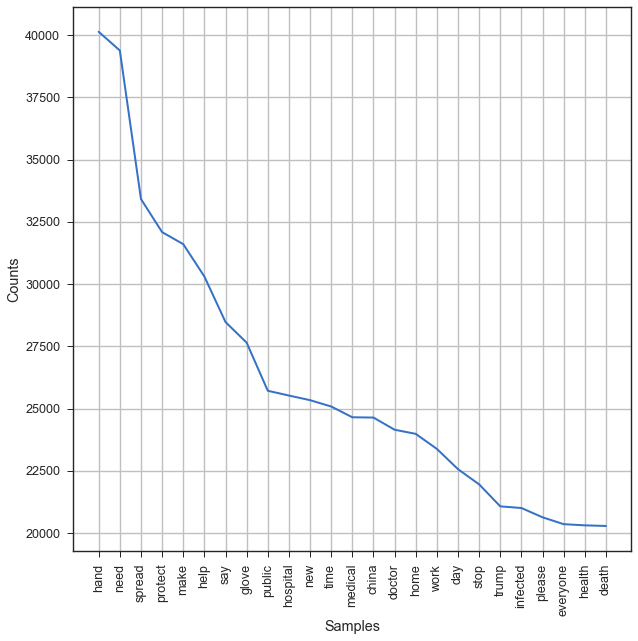

In [29]:
fdist = FreqDist(words)
plt.figure(figsize=(10,10))
fdist.plot(25)

# LDA

In [30]:
from gensim import matutils, models
import scipy.sparse

# One of the required inputs is a term-document matrix
tdm = data_vec.transpose()
tdm.head()

# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [106]:
import gzip

In [107]:
with gzip.open('gensim_corpus2.pkl', 'wb') as handle:
    pickle.dump(corpus, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [31]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=10)
lda.print_topics()

[(0,
  '0.021*"pandemic" + 0.015*"trump" + 0.014*"health" + 0.014*"state" + 0.012*"patient" + 0.010*"medical" + 0.010*"hospital" + 0.009*"care" + 0.009*"news" + 0.009*"worker"'),
 (1,
  '0.045*"social" + 0.039*"distancing" + 0.025*"please" + 0.024*"hand" + 0.023*"stay" + 0.021*"safe" + 0.015*"distance" + 0.014*"home" + 0.013*"keep" + 0.012*"facewithmedicalmask"'),
 (2,
  '0.021*"death" + 0.016*"protest" + 0.016*"case" + 0.012*"new" + 0.011*"lockdown" + 0.009*"business" + 0.009*"police" + 0.008*"fight" + 0.008*"country" + 0.007*"order"'),
 (3,
  '0.008*"want" + 0.008*"see" + 0.007*"still" + 0.007*"think" + 0.007*"got" + 0.006*"facewithtearsofjoy" + 0.006*"trump" + 0.006*"day" + 0.006*"without" + 0.006*"back"'),
 (4,
  '0.018*"spread" + 0.012*"protect" + 0.011*"stop" + 0.009*"others" + 0.009*"say" + 0.007*"infected" + 0.007*"need" + 0.007*"help" + 0.007*"prevent" + 0.007*"risk"')]

In [39]:
import pickle

In [40]:
with open('lda_v1.pkl', 'wb') as handle:
    pickle.dump(lda, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
# Let's take a look at which topics each transcript contains
corpus_transformed = lda[corpus]

In [41]:
len(corpus_transformed)

575949

In [51]:
corpus_transformed[3]

[(0, 0.033419695),
 (1, 0.03341969),
 (2, 0.034334242),
 (3, 0.8652218),
 (4, 0.033604573)]

In [53]:
corpus_df = pd.DataFrame(corpus_transformed)
corpus_df.head()

,0,1,2,3,4
0,"(0, 0.3741839)","(1, 0.028728412)","(2, 0.29015267)","(3, 0.27750286)","(4, 0.029432131)"
1,"(0, 0.0706517)","(1, 0.011818341)","(2, 0.011832589)","(3, 0.89365095)","(4, 0.012046404)"
2,"(1, 0.269853)","(2, 0.30015826)","(3, 0.25488272)","(4, 0.16526082)",None
3,"(0, 0.033419695)","(1, 0.033419695)","(2, 0.034338985)","(3, 0.8652171)","(4, 0.033604585)"
4,"(0, 0.27751666)","(1, 0.35520992)","(2, 0.023750711)","(3, 0.3205183)","(4, 0.023004448)"


In [80]:
dict(corpus_transformed[2])

{1: 0.2698548, 2: 0.30015984, 3: 0.25488913, 4: 0.16525105}

In [55]:
corpus_transformed[2]

[(1, 0.2698649), (2, 0.30016503), (3, 0.2549054), (4, 0.1652195)]

In [88]:
def lda_getter(x):
    x_dict = dict(x)
    return int(max(x_dict, key=x_dict.get))

In [85]:
df['lda_scores'] = corpus_transformed
df['lda_scores'].head()

0        [(0, 0.37418506), (1, 0.028728412), (2, 0.2901532), (3, 0.27750123), (4, 0.029432064)]
1    [(0, 0.070643835), (1, 0.0118183745), (2, 0.011832593), (3, 0.89365155), (4, 0.012053657)]
2                          [(1, 0.26986384), (2, 0.30016705), (3, 0.25491711), (4, 0.16520685)]
3      [(0, 0.033419695), (1, 0.03341969), (2, 0.034335677), (3, 0.86522037), (4, 0.033604577)]
4        [(0, 0.27752057), (1, 0.35520992), (2, 0.023759414), (3, 0.3205055), (4, 0.023004547)]
Name: lda_scores, dtype: object

In [89]:
df['lda'] = df['lda_scores'].apply(lambda x: lda_getter(x))
df['lda'].head()

0    0
1    3
2    2
3    3
4    1
Name: lda, dtype: int64

In [91]:
df.to_csv('Datasets/5k_jan_thru_may_tweets_plus_features.csv')

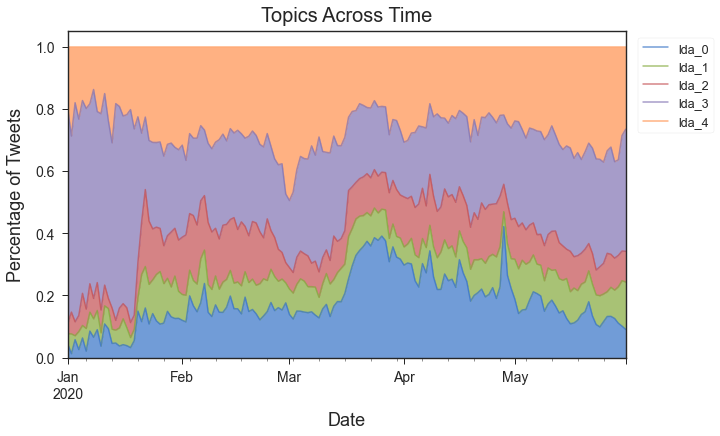

In [122]:
# sort by percentage of trees in good health
days = df.groupby('date').lda.value_counts(normalize=True).unstack()

# plot a stacked bar graph
p1 = days.plot.area(stacked = True, figsize=(10,6),
#                    title = 'Tree Health Across Boroughs', 
                   alpha = .70, fontsize=14)

p1.set_title('Topics Across Time', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Percentage of Tweets', fontsize=18, labelpad=10)
p1.legend(['lda_0', 'lda_1','lda_2', 'lda_3', 'lda_4'], facecolor='white',
          framealpha=1, bbox_to_anchor=(1.01, 1.0), loc='upper left')
plt.show()

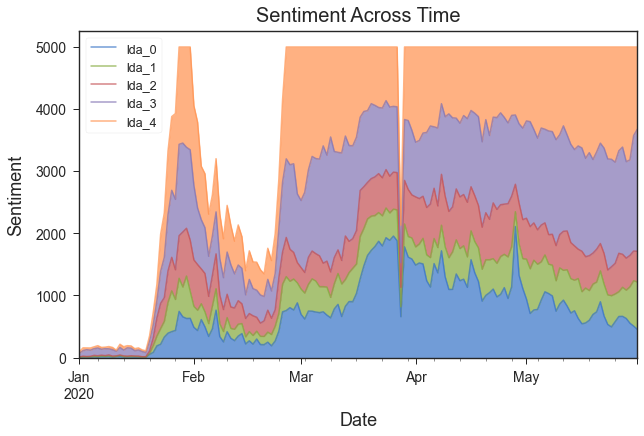

In [117]:
# sort by percentage of trees in good health
days = df.groupby('date').lda.value_counts().unstack()

# plot a stacked bar graph
p1 = days.plot.area(stacked = True, figsize=(10,6),
#                    title = 'Tree Health Across Boroughs', 
                   alpha = .70, fontsize=14)

p1.set_title('Sentiment Across Time', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['lda_0', 'lda_1','lda_2', 'lda_3', 'lda_4'], facecolor='white', framealpha=1)
plt.show()

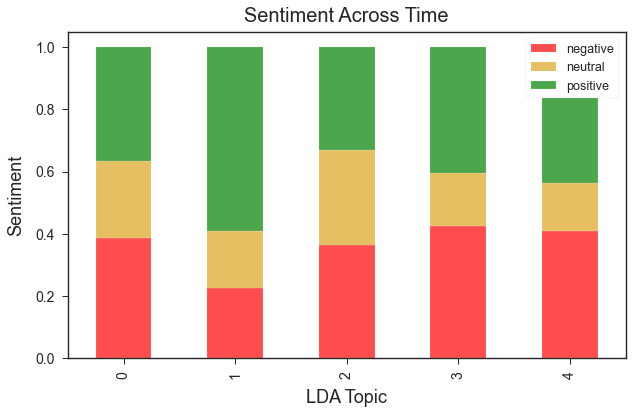

In [102]:
# sort by percentage of trees in good health
days = df.groupby('lda').sentiment.value_counts(normalize=True).unstack()

# plot a stacked bar graph
p1 = days.plot(kind='bar', stacked = True, figsize=(10,6),
#                    title = 'Tree Health Across Boroughs', 
                   color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Sentiment Across Time', fontsize=20, pad=10)
p1.set_xlabel('LDA Topic', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['negative', 'neutral', 'positive'], facecolor='white', framealpha=1)
plt.show()

In [101]:
lda.print_topics()

[(0,
  '0.021*"pandemic" + 0.015*"trump" + 0.014*"health" + 0.014*"state" + 0.012*"patient" + 0.010*"medical" + 0.010*"hospital" + 0.009*"care" + 0.009*"news" + 0.009*"worker"'),
 (1,
  '0.045*"social" + 0.039*"distancing" + 0.025*"please" + 0.024*"hand" + 0.023*"stay" + 0.021*"safe" + 0.015*"distance" + 0.014*"home" + 0.013*"keep" + 0.012*"facewithmedicalmask"'),
 (2,
  '0.021*"death" + 0.016*"protest" + 0.016*"case" + 0.012*"new" + 0.011*"lockdown" + 0.009*"business" + 0.009*"police" + 0.008*"fight" + 0.008*"country" + 0.007*"order"'),
 (3,
  '0.008*"want" + 0.008*"see" + 0.007*"still" + 0.007*"think" + 0.007*"got" + 0.006*"facewithtearsofjoy" + 0.006*"trump" + 0.006*"day" + 0.006*"without" + 0.006*"back"'),
 (4,
  '0.018*"spread" + 0.012*"protect" + 0.011*"stop" + 0.009*"others" + 0.009*"say" + 0.007*"infected" + 0.007*"need" + 0.007*"help" + 0.007*"prevent" + 0.007*"risk"')]

In [124]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'tweet', 'hashtags',
       'user_id', 'username', 'name', 'link', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'retweet_id', 'reply_to', 'sentiment_score',
       'sentiment', 'month', 'lda_scores', 'lda', 'subjectivity_score'],
      dtype='object')

## Subjectivity

In [108]:
df['subjectivity_score'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.subjectivity_score.head()

0    0.600000
1    0.560000
2    0.462963
3    0.000000
4    0.500000
Name: subjectivity_score, dtype: float64

In [109]:
df.subjectivity_score.describe()

count    575949.000000
mean          0.370732
std           0.290762
min           0.000000
25%           0.050000
50%           0.397576
75%           0.565000
max           1.000000
Name: subjectivity_score, dtype: float64

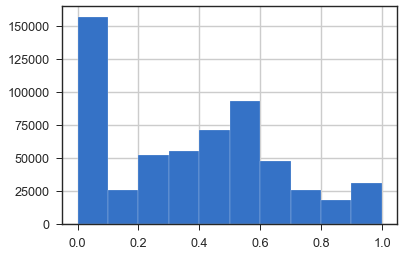

In [110]:
df.subjectivity_score.hist()

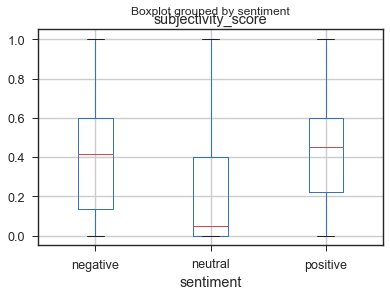

In [114]:
df.boxplot('subjectivity_score', 'sentiment')

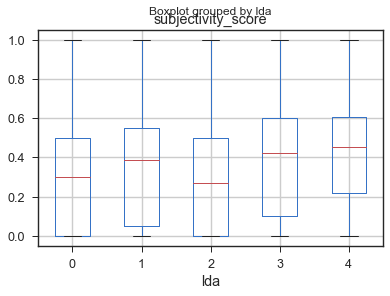

In [115]:
df.boxplot('subjectivity_score', 'lda')

# Train Test Split

In [5]:
with gzip.open('Datasets/features_df.pkl', 'rb') as handle:
    features_df = pickle.load(handle)

In [6]:
df = pd.read_csv('Datasets/5k_tweets_lda_10.csv', index_col=0)
df.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,created_at,date,tweet,hashtags,user_id,username,name,link,...,clean_tweets,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9
0,1.212523e+18,1.212523e+18,1.577923e+12,2020-01-01,"https://mltshp.com/p/1HLSB ""This is the death mask of Thomas, an unknown peasant that died in a river.""",[],8.431951e+17,Best_of_MLTSHP,MLTSHP,https://twitter.com/Best_of_MLTSHP/status/1212523477896294400,...,death thomas unknown peasant died river,0,0,0,0,0,1,0,0,0
1,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,Ready to heard this? Homemade hair treatment and ann cherry dead sea mud mask... Fucking putas swear they are more woman than me.... Bitch shut th...,[],1.044739e+18,lumora_lu,MiLu,https://twitter.com/lumora_lu/status/1212518043353530368,...,ready heard homemade hair treatment ann cherry dead sea mud fucking putas swear woman bitch shut fuck,0,0,0,0,1,0,0,0,0
2,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,"We all know what a joke #CCPChina is when it comes to epidemic outbreak,think of how they stayed silent about #SARS.\nDear world,stay away from #H...","['#ccpchina', '#sars', '#hk', '#hkers']",9.630325e+17,odiecher,odiecher,https://twitter.com/odiecher/status/1212517557690748928,...,joke #ccpchina come epidemic outbreakthink stayed silent #sars dear worldstay away #hk im sure infected amongst already dear fellow #hkers facewit...,1,0,0,0,0,0,0,0,0
3,1.212516e+18,1.200523e+18,1.577921e+12,2020-01-01,Thought death masks gave you the horn freak,[],2.819219e+09,Hevysmoker,Ashley Collins,https://twitter.com/Hevysmoker/status/1212515585562726401,...,thought death gave horn freak,0,0,0,0,0,0,0,1,0
4,1.212510e+18,1.212391e+18,1.577920e+12,2020-01-01,"Interesting cult of death mask he’s wearing, 🤔\nelectronically posing as he did as of the CIA while Brennan was Chief. 🧐",[],2.361956e+08,FaithR8s,❌Patriot Fan🇺🇸🗽☕️🎶❌,https://twitter.com/FaithR8s/status/1212510409858670593,...,interesting cult death thinkingface electronically posing cia brennan chief facewithmonocle,0,0,0,0,0,0,0,1,0


In [7]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'tweet', 'hashtags',
       'user_id', 'username', 'name', 'link', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'retweet_id', 'reply_to', 'sentiment_score',
       'sentiment', 'lda_scores', 'lda', 'subjectivity_score', 'clean_tweets',
       'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7', 'lda_8',
       'lda_9'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, df.sentiment, test_size=0.25, random_state=1)

In [9]:
print(X_train.shape)
print(X_test.shape)

(431961, 3725)
(143988, 3725)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smoten = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smoten.fit_sample(X_train_scaled, y_train)

In [ ]:
features = data_vec.copy()

In [ ]:
dummies = pd.get_dummies(df_final['lda'], drop_first=True)

In [ ]:
features = df_final[['nlikes', 'nreplies', 'nretweets', ]]
y = df_final['sentiment']

In [4]:
df = pd.read_csv('Datasets/5k_tweets_lda_10.csv', index_col=0)
df.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,created_at,date,tweet,hashtags,user_id,username,name,link,...,clean_tweets,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9
0,1.212523e+18,1.212523e+18,1.577923e+12,2020-01-01,"https://mltshp.com/p/1HLSB ""This is the death mask of Thomas, an unknown peasant that died in a river.""",[],8.431951e+17,Best_of_MLTSHP,MLTSHP,https://twitter.com/Best_of_MLTSHP/status/1212523477896294400,...,death thomas unknown peasant died river,0,0,0,0,0,1,0,0,0
1,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,Ready to heard this? Homemade hair treatment and ann cherry dead sea mud mask... Fucking putas swear they are more woman than me.... Bitch shut th...,[],1.044739e+18,lumora_lu,MiLu,https://twitter.com/lumora_lu/status/1212518043353530368,...,ready heard homemade hair treatment ann cherry dead sea mud fucking putas swear woman bitch shut fuck,0,0,0,0,1,0,0,0,0
2,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,"We all know what a joke #CCPChina is when it comes to epidemic outbreak,think of how they stayed silent about #SARS.\nDear world,stay away from #H...","['#ccpchina', '#sars', '#hk', '#hkers']",9.630325e+17,odiecher,odiecher,https://twitter.com/odiecher/status/1212517557690748928,...,joke #ccpchina come epidemic outbreakthink stayed silent #sars dear worldstay away #hk im sure infected amongst already dear fellow #hkers facewit...,1,0,0,0,0,0,0,0,0
3,1.212516e+18,1.200523e+18,1.577921e+12,2020-01-01,Thought death masks gave you the horn freak,[],2.819219e+09,Hevysmoker,Ashley Collins,https://twitter.com/Hevysmoker/status/1212515585562726401,...,thought death gave horn freak,0,0,0,0,0,0,0,1,0
4,1.212510e+18,1.212391e+18,1.577920e+12,2020-01-01,"Interesting cult of death mask he’s wearing, 🤔\nelectronically posing as he did as of the CIA while Brennan was Chief. 🧐",[],2.361956e+08,FaithR8s,❌Patriot Fan🇺🇸🗽☕️🎶❌,https://twitter.com/FaithR8s/status/1212510409858670593,...,interesting cult death thinkingface electronically posing cia brennan chief facewithmonocle,0,0,0,0,0,0,0,1,0


In [5]:
df.sentiment.value_counts(normalize=True)

positive    0.415315
negative    0.384345
neutral     0.200341
Name: sentiment, dtype: float64

In [81]:
ctd = dict(corpus_transformed[2])
int(max(ctd, key=ctd.get))

2

In [64]:
weights = [topic[1] for topic in corpus_transformed[2]]
x = 0
for topic in corpus_transformed[2]:
    if topic[1] == max(weights):
        x = topic[0]

In [75]:
max(corpus_transformed[2], key=corpus_transformed[2].get)

AttributeError: 'list' object has no attribute 'get'

In [73]:
weights = [topic[1] for topic in corpus_transformed[2]]
weights

[0.26986057, 0.30016413, 0.25490528, 0.16522484]

In [67]:
max(weights)

0.30016604

In [52]:
max(corpus_transformed[3][1])

1

In [74]:
list(zip([a for [(a,b)] in corpus_transformed], data_vec.index))

ValueError: too many values to unpack (expected 1)

In [44]:
test = [a for [(a,b)] in corpus_transformed]
test

ValueError: too many values to unpack (expected 1)

In [43]:
data_vec.index

RangeIndex(start=0, stop=575949, step=1)

# SCRAP HEAP

In [126]:
pos = TextBlob(tweets[2])
print(pos.tags)

[('Using', 'VBG'), ('the', 'DT'), ('coverage', 'NN'), ('of', 'IN'), ('his', 'PRP$'), ('yellow', 'JJ'), ('card', 'NN'), ('to', 'TO'), ('mask', 'VB'), ('the', 'DT'), ('fact', 'NN'), ('his', 'PRP$'), ('team', 'NN'), ('lost', 'VBD'), ('to', 'TO'), ('Southampton', 'NNP'), ('ClassicJose', 'NNP'), ('CoverUp', 'NNP')]


In [122]:
for tag in pos.tags:
    if 'mask' in tag[0]:
        print(tag)

('masks', 'NNS')


In [115]:
for tweet in tweets[5:10]:
    pos = TextBlob(tweet)
    print(pos.tags)

[('.My', 'NN'), ('daughter', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('sick', 'VBN'), ('with', 'IN'), ('a', 'DT'), ('nasty', 'JJ'), ('cough', 'NN'), ('for', 'IN'), ('weeks', 'NNS'), ('She', 'PRP'), ('ignores', 'VBZ'), ('my', 'PRP$'), ('advice', 'NN'), ('about', 'IN'), ('wearing', 'VBG'), ('a', 'DT'), ('mask', 'NN'), ('Can', 'NNP'), ('any', 'DT'), ('Drs', 'NNP'), ('out', 'IN'), ('there', 'RB'), ('please', 'VB'), ('tweet', 'NN'), ('about', 'IN'), ('the', 'DT'), ('health', 'NN'), ('impacts', 'NNS'), ('of', 'IN'), ('breathing', 'VBG'), ('this', 'DT'), ('toxic', 'NN'), ('air', 'NN'), ('even', 'RB'), ('when', 'WRB'), ('it', 'PRP'), ("'s", 'VBZ'), ('not', 'RB'), ('smelling', 'JJ'), ('strongly', 'RB'), ('of', 'IN'), ('smoke', 'NN'), ('so', 'IN'), ('that', 'IN'), ('I', 'PRP'), ('can', 'MD'), ('show', 'VB'), ('her', 'PRP$'), ('I', 'PRP'), ('am', 'VBP'), ('not', 'RB'), ('full', 'JJ'), ('of', 'IN'), ('shit', 'NN')]
[('😺✏', 'NN'), ('—', 'NNP'), ('Aside', 'NNP'), ('from', 'IN'), ('butt', 'NN'), ('ma

In [24]:
Counter(words).most_common(25)

[('hand', 40134),
 ('need', 39383),
 ('spread', 33418),
 ('protect', 32088),
 ('make', 31605),
 ('help', 30306),
 ('say', 28477),
 ('glove', 27649),
 ('public', 25717),
 ('hospital', 25525),
 ('new', 25340),
 ('time', 25085),
 ('medical', 24652),
 ('china', 24641),
 ('doctor', 24152),
 ('home', 23986),
 ('work', 23382),
 ('day', 22567),
 ('stop', 21958),
 ('trump', 21074),
 ('infected', 21008),
 ('please', 20635),
 ('everyone', 20359),
 ('health', 20312),
 ('death', 20287)]

In [26]:
word_dict = dict(Counter(words))
word_dict['hand']

40134

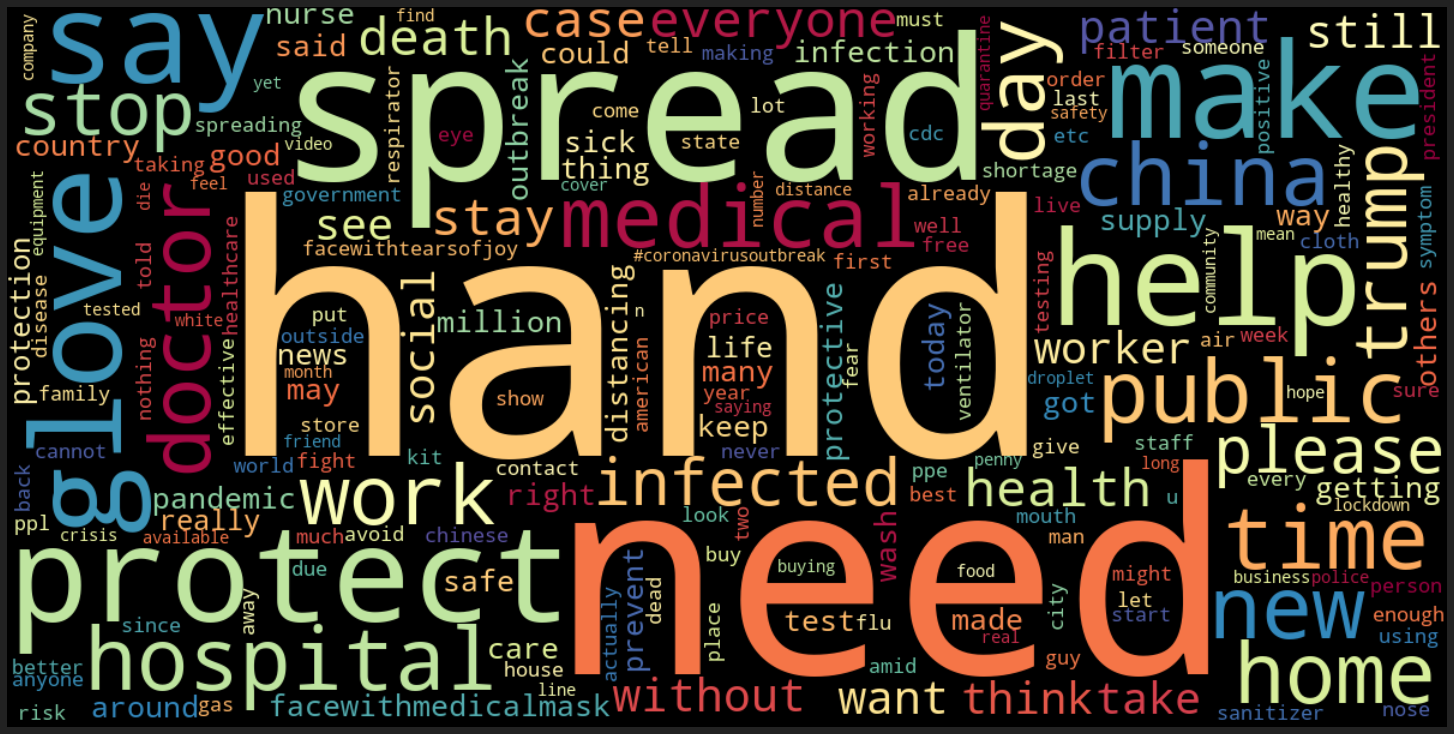

In [37]:
from wordcloud import WordCloud
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral', width=1200, height=600).generate_from_frequencies(word_dict)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
wordcloud.to_file('wordcloud.jpg')

plt.show()

In [31]:
top_word_dict = dict(Counter(words).most_common(100))

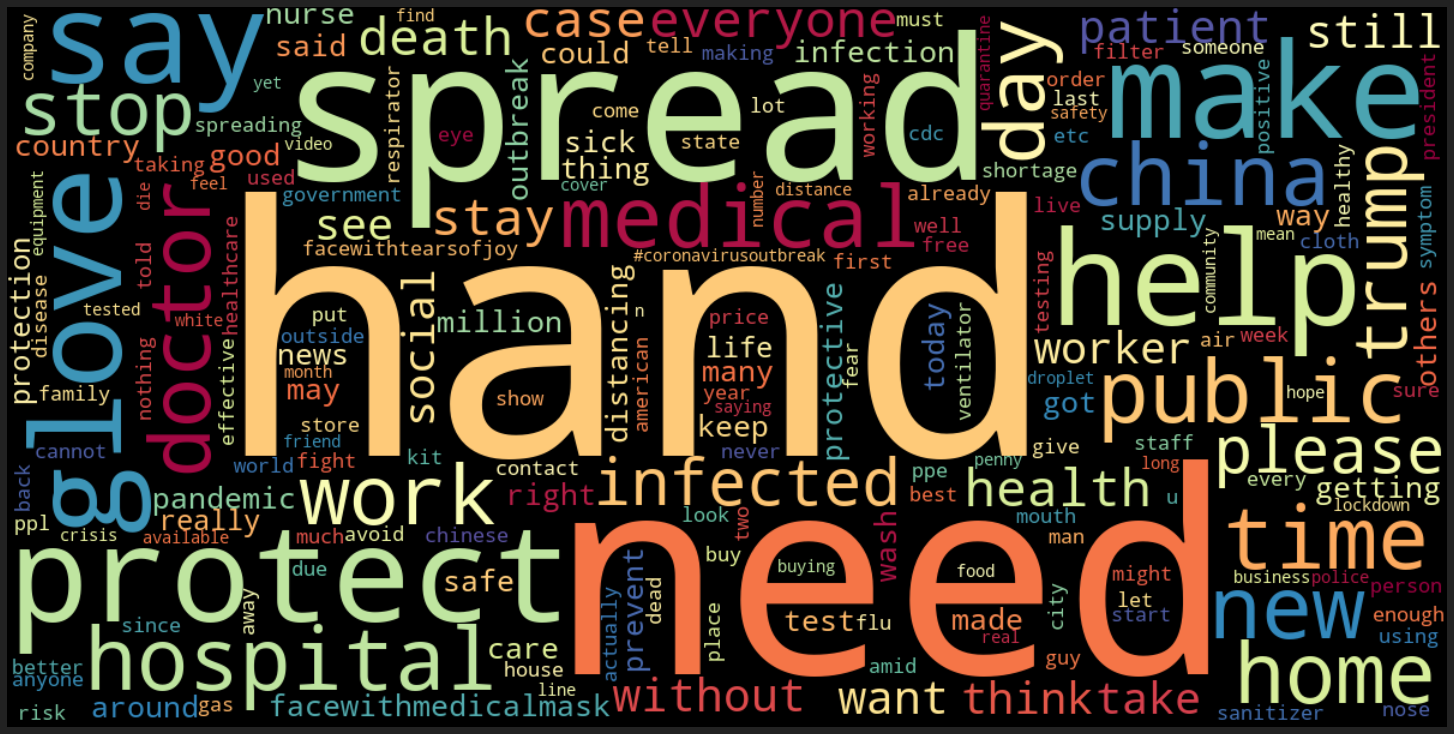

In [38]:
wordcloud_top100 = WordCloud(colormap='Spectral', width=1200, height=600).generate_from_frequencies(top_word_dict)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

In [39]:
wordcloud_top100.to_file('wordcloud_top100.jpg')